### Ejercicio 1. Búsqueda de raíces.

(a) Escribe una función en Python que implemente el método de Newton. Utiliza alguno de los criterios de parada que hemos visto en clase. 

(b) ¿Cuántas raíces tiene el polinomio $x² - 5$ en el intervalo $[-3, 3]$? Utiliza tu método de Newton para obtener todas las raíces del polinomio anterior en dicho intervalo. 

(c) Obtén numéricamente el orden de convergencia del Método de Newton al calcular la raíz negativa de la función $f_1(x) = x² - 5$ dando como estimador inicial $x = -3$. Recuerda que el orden de convergencia es $\alpha > 0$ si el error, $e_{n}$, cumple
$$
\dfrac{|e_{n+1}|}{|e_n|^{\alpha}} \longrightarrow K
$$
para algún $K$ positivo. 

(d) Compara el orden de convergencia obtenido con el que se obtiene al aproximar la raíz de la función $f_2(x) = x^2 - \cos(x) + 1$. ¿Cómo explicas ésto?

(e) Uno de los inconvenientes del método de Newton es la inconveniencia de tener que evaluar la derivada, lo que a veces supone un alto coste computacional. Una variante del método de Newton, que suprime este inconiente, es evaluar la derivada solamente una vez y utilizarla en todas las iteraciones. Dicho método se denomina de Von Mises. Implementa el método de Von Mises y calcula el orden de convergencia numéricamente utilizando $f(x)$. Compara el tiempo de ejecución entre los métodos de Newton y Von Mises cuando se aplica a los ejemplos anteriores ¿Cómo explicas este resultados? A juzgar por lo qe hemos visto, ¿qué te parece este método respecto al de Newton? 

(f) El método de Newton aproxima la función por su recta tangente. Existe un método llamado "de Halley" (Sí, es el mismo Halley que da nombre al cometa) que aproxima la función por su parábola tangente. Se trata de un método de punto fijo, 
$$
x_{n+1} = x_n + g_{H}(x_n),
$$
en el que la función $g_{H}(x)$ viene dada por 
$$
g_{H}(x) := - \dfrac{f(x_n)}{f^{\prime}(x_n)} \left[ 1 - \dfrac{f(x_n)}{f^{\prime}(x_n)} \dfrac{f^{\prime\prime}(x_n)}{2 f^{\prime}(x_n)} \right]^{-1}, 
$$
donde $f(x)$ es la función cuyas raíces deseamos aproximar. 

Implementa el método de Halley y aplícalo al caso anterior. ¿Cuál es el orden de convergencia? Busca información sobre el orden de convergencia del método de Halley. ¿Te cuadra con lo que sale? ¿Sabrías explicar por qué? 

(g) Aplica ahora el método de Halley para obtener las raíces de la siguiente ecuación:
$$
xe^x = - \dfrac{1}{2e}
$$
Obtén el orden de convergencia. 

### Solución:

### Apartado (a).
Implementamos el método de Newton:

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import time

In [86]:
def metodo_newton(f, fp, x0, ytol, maxiter=100):
    x      = x0
    roots  = [x]
    error  = np.abs(f(x))
    errors = [error]
    
    k = 0 #contador 
    while error > ytol and k < maxiter:
        x = np.longdouble(x - f(x)/fp(x))
        error = np.longdouble(np.abs(f(x)))
        errors.append(error)
        roots.append(x)
        
        k = k + 1
        
    return x, errors, roots

### Apartados (b) y (c)
Dibujamos la función que nos piden para ver cuántas raíces tiene en el intervalo. Obtenemos las raíces y calculamos el orden de convergencia para el caso de la raíz negativa. 

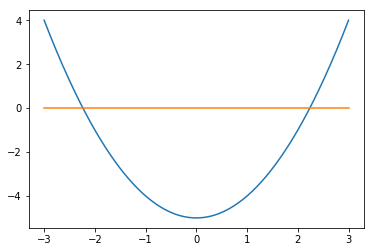

In [84]:
def f_1(x):
    return x*x - 5.

x = np.linspace(-3, 3, 200)
y = f_1(x)

plt.plot(x, y)
plt.plot(x, np.zeros(len(x)))

def df_1(x):
    return 2*x

In [87]:
# Obtenemos las raices, calculamos el tiempo de ejecucion (lo usare despues).
# Tambien obtengo el orden de convergencia. Tenemos el problema del inifito cuando converge, 
# Lo comento en uno de los cuadernos de moodle, de la seccion "material complementario"
ytol = 1e-22

# Primera riz, con calculo del tiempo de ejecucion
time_nw_ej1         = 0.
start_time          = time.time()
x_1, err_1, roots_1 = metodo_newton(f_1, df_1, -3., ytol)
time_nw_ej1         = time.time() - start_time

# Segunda raiz:
x_2, err_2, roots_2 = metodo_newton(f_1, df_1, 3., ytol)

print("Las raíces están en:")
print(x_1)
print(x_2)
print("- - "*10)

# Orden de convergencia en la primera de las raices:
for k in range(1, len(err_1)):
    print(np.log(err_1[k])/np.log(err_1[k-1]))

Las raíces están en:
-2.2360679774997896964
2.2360679774997896964
- - - - - - - - - - - - - - - - - - - - 
-0.58496250072115507965
5.799204938088564901
2.6374024477720192233
2.2415320661240185451
inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


### Apartado (d) 
Aplicamos el método de Newton a la nueva función y obtenemos el orden de convergencia

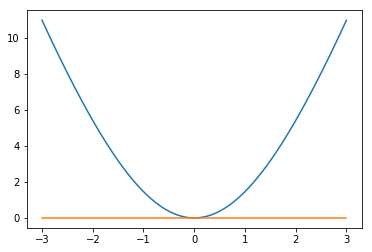

In [88]:
def f_2(x):
    return x*x - np.cos(x) + 1

def df_2(x):
    return 2*x + np.sin(x)

x = np.linspace(-3, 3, 200)
y = f_2(x)

plt.plot(x, y)
plt.plot(x, np.zeros(len(x)))

In [90]:
# Obtenemos la raiz y calculamos el orden de convergencia.
# Tambien calculo el tiempo de ejecución porque lo voy a usar después.
time_nw_ej2         = 0.
start_time          = time.time()
x_1, err_1, roots_1 = metodo_newton(f_2, df_2, -3, ytol)
time_nw_ej2         = time.time() - start_time

print("Las raiz es:")
print(x_1)
print("- - "*10)

# Orden de convergencia en la primera de las raices:
for k in range(1, len(err_1)):
    print(np.log(err_1[k])/np.log(err_1[k-1]))

Las raiz es:
-1.2569118011695058461e-10
- - - - - - - - - - - - - - - - - - - - 
0.31200693723899277312
-0.922109704079113137
3.027259734997897655
1.6654177066162701208
1.3989281123757842996
1.2850565453914273296
1.221802674857371663
1.1815328437964524427
1.1536408809692150091
1.1331789220041949036
1.1175267816312398542
1.1051668492142102734
1.0951592484039971941
1.0868907859576570996
1.0799443577513029454
1.0740263673295980397
1.0689241619899531848
1.0644799364051347011
1.0605741209185855128
1.0571144627321913288
1.0540286458099501277
1.0512591802464176098
1.0487597985218685404
1.0464927816611939503
1.0444272049498288437
1.0425376838871030857
1.0408009224402801899
1.0392093282899045395
1.0377097893432938703
1.0364562483768990226
1.034675299965474343
1.0338983050847457628
1.0327868852459016393
inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


El orden de convergencia converge a 1. En este caso no se trata de un problema numérico como el que vimos en clase (Recordad que en aquella ocasión obteniamos exactamente $1.0$, cosa sospechosa que revelaba un problema numérico). La raíz de esta ecuación es $x_{\ast} = 0$. La derivada de esta función vale cero en la raíz:

$$
f_2^{\prime}(x) = 2x + \sin(x), \;\; f_2^{\prime}(0) = 0 
$$

Por tanto, la deducción que se hace para demostrar que el orden de convergencia es $2$ no es válida. En efecto, se observa que el orden de convergencia aquí es menor. 

### Apartado (e) 
Método de Von Mises

In [91]:
def metodo_vonmises(f, fp, x0, ytol, maxiter=100):
    x      = x0
    error  = np.abs(f(x))
    errors = [error]
    roots  = [x]
    fp0    = fp(x)
    
    k = 0 #contador 
    while error > ytol and k < maxiter:
        
        x     = np.longdouble(x - f(x)/fp0)
        error = np.longdouble(np.abs(f(x)))
        errors.append(error)
        roots.append(x)
        
        k = k + 1
        
    return x, errors, roots

In [93]:
### Obtenemos el orden de convergencia y comparamos ambos metodos para ambos ejemplos:

# Ejemplo 1:
time_vm_ej1         = 0.
start_time          = time.time()
x_1, err_1, roots_1 = metodo_vonmises(f_1, df_1, -3, ytol)
time_vm_ej1         = time.time() - start_time

# Orden de convergencia en la primera de las raices:
print("Orden de convergencia de Von Mises en el ejemplo 1")
for k in range(1, len(err_1)):
    print(np.log(err_1[k])/np.log(err_1[k-1]))

#elog   = np.log(errors)
#orden_vm_1  = np.mean(elog[1:]/elog[:-1])
#print("El orden de convergencia de Von Mises en el ejemplo 1 es: ", orden_vm_1)
#print("Con el metodo de Newon el orden era                     : ", orden_nw_1 )

# Ejemplo 2:
time_vm_ej2         = 0.
start_time          = time.time()
x_2, err_2, roots_2 = metodo_vonmises(f_2, df_2, -3, ytol)
time_vm_ej2         = time.time() - start_time

# Orden de convergencia en la primera de las raices:
print("Orden de convergencia de Von Mises en el ejemplo 2")
for k in range(1, len(err_2)):
    print(np.log(err_2[k])/np.log(err_2[k-1]))
    
#elog   = np.log(errors)
#orden_vm_2  = np.mean(elog[1:]/elog[:-1])
#print("El orden de convergencia de Von Mises en el ejemplo 2 es: ", orden_vm_2)
#print("Con el metodo de Newon el orden era                     : ", orden_nw_2 )

# Y los tiempos:
print(" ================================== ")
print("Tiempo de ejecucion en el ejemplo 1:")
print("Newton   : ", time_nw_ej1)
print("Von Mises: ", time_vm_ej1)

print("Tiempo de ejecucion en el ejemplo 2:")
print("Newton   : ", time_nw_ej2)
print("Von Mises: ", time_vm_ej2)

Orden de convergencia de Von Mises en el ejemplo 1
-0.58496250072115507965
2.788082558165754087
1.613486642849714442
1.3762810943089596269
1.2726928703328144309
1.2141230350620578918
1.1763306265812706316
1.1498924568350637046
1.1303520378278823628
1.1153195394989570151
1.1033958915003329072
1.0937069584100281524
1.0856783011196719099
1.0789168393953767931
1.0731445059186706364
1.0681590461387788232
1.0638098291443733948
1.0599823642240164281
1.0565880797176929696
1.0535573737358666856
1.0508348002385776965
1.0483756970998733074
1.0461433455437478395
1.044108787593114786
1.0422431157250418639
1.0405294318003134178
1.0390198046335092277
1.0377465371032624309
1.0375855893548736958
1.035287015467786057
inf
Orden de convergencia de Von Mises en el ejemplo 2
0.31200693723899277312
0.13126881885352608971
-3.656293893588951894
1.997755689506748389
1.4132311517025083806
1.2502303016484859367
1.1752905569837783609
1.1328555119368460009
1.1058298903275865808
1.087254726139161894
1.07378307407994

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


El orden de convergencia en el método de Von Mises claramente tiende a $1$. Por otro lado el método de Newton presenta menor tiempo de ejecución, por lo que al final lo que ganamos al dejar de evaluar la derivada, lo perdemos por tener que realizar más iteraciones (Se observa claramente que el número de iteraciones con el método de Von Mises es mayor). En conclusión, el Método de Von Mises no presenta ninguna mejora respecto al método de Newton, al menos en los casos evaluados. El método de Newton es claramente superior. 

### Apartado (f)
Método de Halley. Tanto el método de Newton como el método de Halley se enmarcan dentro de los llamados métodos de Householder. En esta web podréis encontrar más información, si os interesa el tema (este contenido no es avaluable y no lo preguntaremos en ningún examen): https://en.wikipedia.org/wiki/Householder%27s_method

In [94]:
def metodo_halley(x0, f, fp, fpp, ytol=1e-16, maxiter=100):
    x      = x0
    error  = np.abs(f(x))
    errors = [error]
    roots  = [x]
    
    k = 0 #contador 
    while error > ytol and k < maxiter:
     
        # Precalculamos un término auxiliar:
        ffp   = f(x)/fp(x)
        
        # Actualizamos la raiz:
        x     = np.longdouble(x - ffp / (1. - (ffp * fpp(x) / fp(x) / 2.)))
        error = np.longdouble(np.abs(f(x)))
        errors.append(error)
        roots.append(x)
       
        k = k + 1
        
    return x, errors, roots

Aplicamos el método de Halley a la ecuación
$$
f_2(x) = 0.
$$

In [46]:
def d2f_2(x):
    return 2. + np.cos(x)

r, err_2h, roots = metodo_halley(-0.4, f_2, df_2, d2f_2)
print("La raiz es : ", r)

print("Orden de convergencia de Von Mises en el ejemplo 2")
for k in range(1, len(err_2h)):
    print(np.log(err_2h[k])/np.log(err_2h[k-1]))

La raiz es :  -3.0972490648144603347e-09
Orden de convergencia de Von Mises en el ejemplo 2
2.5321254699709632363
1.6060339328813652144
1.3774150983452810926
1.2740078461054221465
1.2150759492141524748
1.1770062206756748634
1.1503868223948540529
1.1307271779541544883
1.1156133685870360946
1.1036321111067145484
1.0939009569506269806
1.0858404552497824047
1.0790543977852555772
1.0732625026134082401
1.0682621189941441962
1.0639010604723958428
1.0601075083910367682


Vemos que el orden de convergencia tiende a $1$. Igual que la deducción del orden de convergencia en el método de Newton requiere que la primera derivada no se anule en la raíz, lo mismo pasa con el método de Halley (Podéis verlo en esta web: https://en.wikipedia.org/wiki/Halley%27s_method). La derivada de esta función se anula en la raíz, por lo que el orden de convergencia no llega al máximo que ofrece el método. 

### Apartado (g)

Aplicamos ahora el método de Halley a la última ecuación. Esta ecuación puede reescribirse como
$$
f_3(x) = 0, \;\; f_3(x) = x e^{x} - \dfrac{1}{2e}
$$
Pintamos la función para ver cómo es y descubrimos que sólo puede tener dos raíces.

La raiz x_1 es :  -2.6783469900166605995
Orden de convergencia de Halley en el ejemplo 3
1.0000000000000000595
1.0000000000000000015
1.0000000000000000108
1.0000000000000000798
1.0000000000000005896
1.0000000000000043568
1.0000000000000321904
1.0000000000002378405
1.0000000000017572669
1.0000000000129831934
1.0000000000959211391
1.0000000007086506706
1.0000000052351518682
1.0000000386719867594
1.0000002856400206258
1.0000021094614678171
1.000015574215510758
1.0001149255639776365
1.0008470153339135253
1.0062159957981379856
1.0446542080579233167
1.2832274099983037107
2.0440587095280488119
2.63318477980858147
2.8617737839743071263
1.2991875473762007171
La raiz x_2 es :  -0.23196095298653444495
Orden de convergencia de Halley en el ejemplo 3
0.9629021453415852642
0.9614728222690825856
0.95992893960384755134
0.95825614819964928444
0.95643759776874170107
0.9544533669950032152
0.9522797303489706905
0.94988820425781738294
0.94724429104167062347
0.94430580260819688577
0.94102059009627883786
0.9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


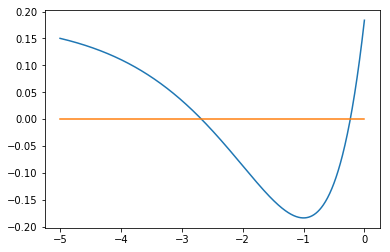

In [95]:
def f_4(x):
    return x * np.exp(x) + 1./(2. * np.exp(1.))

def df_4(x):
    return np.exp(x) + x * np.exp(x)

def d2f_4(x):
    return 2. * np.exp(x) + x * np.exp(x) 
    
x = np.linspace(-5., 0, 1000)
plt.plot(x, f_4(x))
plt.plot(x, np.zeros(len(x)))

r, err_3, roots = metodo_halley(-50, f_4, df_4, d2f_4)
print("La raiz x_1 es : ", r)

print("Orden de convergencia de Halley en el ejemplo 3")
for k in range(1, len(err_3)):
    print(np.log(err_3[k])/np.log(err_3[k-1]))

r, err_3, roots = metodo_halley(50., f_4, df_4, d2f_4)
print("La raiz x_2 es : ", r)

print("Orden de convergencia de Halley en el ejemplo 3")
for k in range(1, len(err_3)):
    print(np.log(err_3[k])/np.log(err_3[k-1]))

Durante varias iteraciones el orden de convergencia se mantiene en torno a 1 (en uno de los cuaderos de moodle dentro del apartado "Material complementario" comentamos ésto). En las últimas iteraciones se aprecia como va tendiendo a 3. No se aprecia bien porque al final converge muy rápido y no podemos ver cómo el orden tiende efectivamente a ese valor. 

### Ejercicio 2. Aproximación.

En un ensayo de canal se mide la resistencia al avance de un modelo y se obtienen una serie de datos. Estos datos se han guardado en una tabla en un archivo csv (ensayo-remolque.csv). La primera columna contiene la velocidad en nudos del modelo; la segunda, la velocidad del modelo en $m/s$; y la tercera, la resistencia al avance en $Kg$. 

(a) Importa la librería pandas y utiliza la funcion " read_csv " para cargar los datos de la tabla en una variable que llamaremos 'data'. Fíjate que debemos especificar que el delimitador de decimales es una coma, para que pandas lo interprete correctamente, pasándole a la función " read_csv " el argumento 
" decimal =',' ". Busca en internet como cargar estos datos en un array de numpy. 

(b) Dibuja la resistencia al avance, en kilogramos, frente a la velocidad en $m/s$.

(c) Aproxima estos datos con polinomios de grado 1, de grado 2 y de grado 3. Compara gráficamente los resultados obtenidos.

(d) Decide cual aproxima mejor los datos utilizando un criterio matemático. Recuerda el error cuadrático que estudiamos para comparar dos vectores:
$$
E^2(u, v) = \sqrt{\sum_{k=0}^{N-1} (u_k - v_k)^2}
$$
donde $u, v$ son los vectores y $u_k, v_k$ sus componentes.

(e) Obtén los coeficientes del polinomio de aproximación de grado 4 sin utilizar las funciones de numpy, sino resolviendo el sistema lineal asociado como hicimos en clase. Compara tu resultado con el que se obtiene con las funciones de numpy.  

### Solución

### Apartados (a) y (b)

Cargamos los datos utilizando la función que nos dice el enunciado. Dibujamos los datos. 

In [1]:
import pandas as pd

data    = pd.read_csv(r'ensayo-remolque.csv', decimal=',') 
data_np = data.to_numpy()

resistencia_kg = data_np[:,2]
velocidad_ms   = data_np[:,1]
print(resistencia_kg)

plt.figure(figsize=(10,6))
plt.plot(velocidad_ms, resistencia_kg, 'ro')

FileNotFoundError: [Errno 2] No such file or directory: 'ensayo-remolque.csv'

### Apartado (c)

Aproximamos con polinomios utilizando las funciones de numpy:

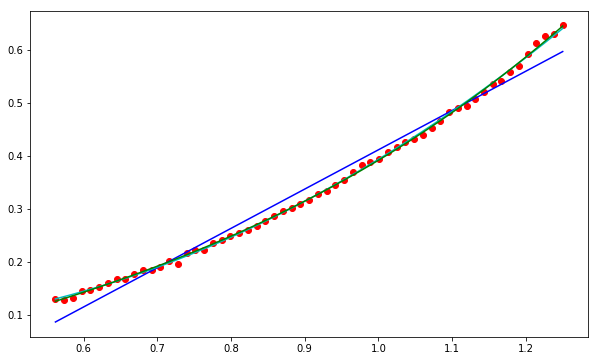

In [110]:
coeffs_1 = np.polyfit(velocidad_ms, resistencia_kg, 1)
coeffs_2 = np.polyfit(velocidad_ms, resistencia_kg, 2)
coeffs_3 = np.polyfit(velocidad_ms, resistencia_kg, 3)

v = np.linspace(velocidad_ms[0], velocidad_ms[-1], 200)
res_1 = lambda x : np.polyval(coeffs_1, x)
res_2 = lambda x : np.polyval(coeffs_2, x)
res_3 = lambda x : np.polyval(coeffs_3, x)

plt.figure(figsize=(10,6))
plt.plot(velocidad_ms, resistencia_kg, 'ro')
plt.plot(v, res_1(v), 'b-')
plt.plot(v, res_2(v), 'c-')
plt.plot(v, res_3(v), 'g-')

### Apartado (d)
Comparamos las aproximaciones usando el error cuadrático

In [ ]:
def quadratic_error(u, v):
    return np.sqrt(np.sum((u - v)**2))

error_1 = quadratic_error(resistencia_kg, res_1(velocidad_ms))
error_2 = quadratic_error(resistencia_kg, res_2(velocidad_ms))
error_3 = quadratic_error(resistencia_kg, res_3(velocidad_ms))

print("Error al aproximar con polinomio de grado 1: ", error_1)
print("Error al aproximar con polinomio de grado 2: ", error_2)
print("Error al aproximar con polinomio de grado 3: ", error_3)

En este caso, el polinomio que mejor aproxima los datos es el de grado 3. 

### Apartado (e)
Obtenemos los coeficientes del polinomio de grado 4 utilizando la matriz de Van Der Mode:

In [111]:
# Obtenemos la matriz de Van der monde:
def vdm(x, m):
    # x es el array de puntos
    # m es el grado del polinomio
    n = len(x)
    return np.repeat(x, m+1).reshape(n, m+1)**np.arange(0, m+1, 1)

V = vdm(velocidad_ms, 4)

A = V.T @ V
b = V.T @ resistencia_kg
coeffs_4    = np.linalg.solve(A, b)[::-1]
coeffs_4_np = np.polyfit(velocidad_ms, resistencia_kg, 4) 

print(coeffs_4)
print(coeffs_4_np)

[ 1.08942323 -3.65182398  5.00754449 -2.60234095  0.54945972]
[ 1.08942322 -3.65182396  5.00754446 -2.60234093  0.54945972]
